# **Exercise 1 - Self Similar Fractals**

## Question 2.1 (Helge Von KoCh)


### Image 0 

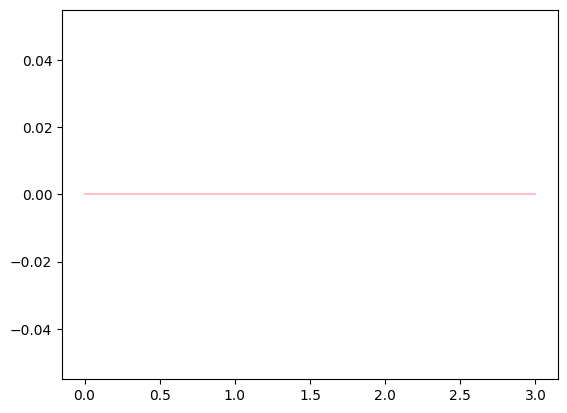

In [183]:
#step 1: draw a line
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import math
x1= 0
y1= 0
x2=3
y2=0
x=np.array([x1,x2])
y=np.array([y1,y2])
plt.plot(x,y, color= "pink")


### Image 1

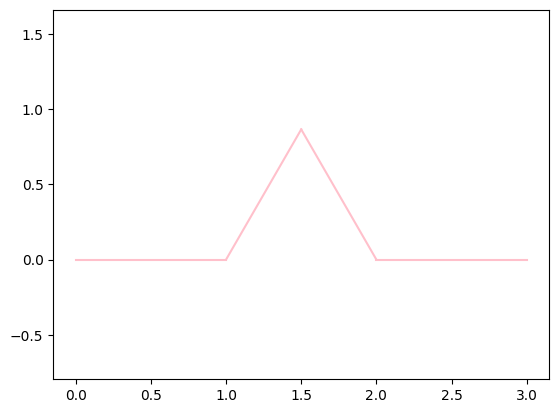

In [182]:
#step 1: draw a line
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import math
x1= 0
y1= 0
x2= 3
y2= 0
x=np.array([x1,x2])
y=np.array([y1,y2])



#step 2 : reduse the length of line by 1/3

# x3, y3 is the coordinate of the point at the end of ths reduced line
def step2 (x1,x2,y1,y2):
    x3= (2*x1+x2)/3       #=(x2-x1)/2 + x1
    a = (y2-y1)/(x2-x1) #slob of the line : y=ax+b
    y3 = y1 + ((x2-x1)/3)*a
    x_2=np.array([x1,x3])
    y_2=np.array([y1,y3])
    return plt.plot(x_2,y_2, color= "pink")


#step 3 : rotating the new line 60 degree and then translating it by the its length

def step3(x1,x2,y1,y2):
    #rotation
    theta = -60
    R= np.matrix([[math.cos(math.radians(theta)), math.sin(math.radians(theta))], [-math.sin(math.radians(theta)), math.cos(math.radians(theta))]]) #rotation matrix
    a = (y2-y1)/(x2-x1) #slob of the line : y=ax+b
    m= np.array([((x2-x1)/3),((x2-x1)/3)*a])
    D= np.matmul(R,m)  #=([x3,y3]-[x1,y1])*R =([x4,y4]-[x1,y1])= [(x4-x1),(y4-y1)] = [D[0],D[1]] this is the vector between the two vector starting from (0,0) to the first and last point of the line
    x4=D[0,0]+x1 
    y4=D[0,1]+y1
    x_3=np.array([x1,x4])         #=np.array([x1,x4])
    y_3=np.array([y1,y4])         #=np.array([y1,y4])
    #translation
    x_5=x_3+(x2-x1)/3
    y_5=y_3+((x2-x1)/3)*a
    return plt.plot(x_5,y_5, color= "pink")


#step 4 : rotating the new line 120 degree and then translating it by the twice of its length

    #rotation
def step4(x1,x2,y1,y2):
    theta = -120
    R= np.matrix([[math.cos(math.radians(theta)), math.sin(math.radians(theta))], [-math.sin(math.radians(theta)), math.cos(math.radians(theta))]]) #rotation matrix
    a = (y2-y1)/(x2-x1) #slob of the line : y=ax+b 
    m= np.array([((x2-x1)/3),((x2-x1)/3)*a])
    D= np.matmul(R,m)  #=([x3,y3]-[x1,y1])*R =([x4,y4]-[x1,y1])= [(x4-x1),(y4-y1)] = [D[0],D[1]] this is the vector between the two vector starting from (0,0) to the first and last point of the line
    x4=D[0,0]+x1 
    y4=D[0,1]+y1
    x_3=np.array([x1,x4])         #=np.array([x1,x4])
    y_3=np.array([y1,y4])         #=np.array([y1,y4])
    #translation
    x_5=x_3+2*(x2-x1)/3 #the coordinate of the 3rd line
    y_5=y_3+2*((x2-x1)/3)*a
    return plt.plot(x_5,y_5, color= "pink")


#step 5 : translating the firt line to the end

def step5 (x1,x2,y1,y2):
    x3= (2*x1+x2)/3       
    a = (y2-y1)/(x2-x1) 
    y3 = y1 + ((x2-x1)/3)*a
    x_2=np.array([x1,x3])
    y_2=np.array([y1,y3])
    x_6=x_2+2*(x2-x1)/3 #the coordinate of the 4th line
    y_6=y_2+2*((x2-x1)/3)*a
    return plt.plot(x_6,y_6, color= "pink")



step2(x1,x2,y1,y2)
step3(x1,x2,y1,y2)
step4(x1,x2,y1,y2)
step5(x1,x2,y1,y2)


plt.axis('equal')
plt.show()


### Image 2

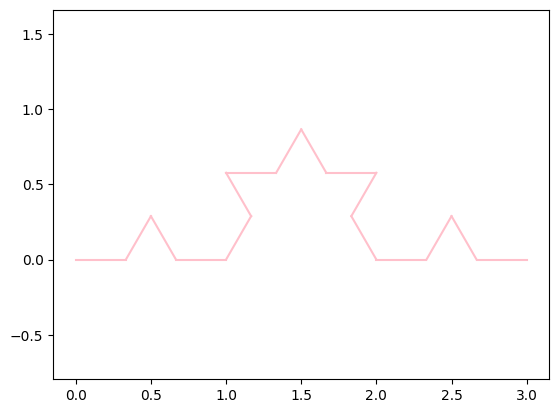

In [184]:
#at this point I saw that my method wasn't correct so I changed it (I didn't delete it because it shows my thinking process and it got alot of effort and time so I didn't want it to go to a waste T T )


image=2 #making a parameter that shows how many times the proccess should be repeated 

initialpoints=[[x1,y1],[x2,y2]]  #this approach was inspired by TA : making a list of the coordinate of the first and last point of every line segment so we can take every elemnt of it
dummypoints=[] #we want to update the points because we want to redo the proccess for each line segment so the first and last point of the lines change

#step 1 : repeating the proccess
for i in range(image): 
#step 2 : making the points
    for j in range(len(initialpoints)-1): 
        x1, y1 = initialpoints[j] #updating the last anf first point of each line segment 
        x2, y2 = initialpoints[j + 1]
        x3 = (2*x1 + x2) / 3  #the logic behind these coordinates has been explained before
        y3 = (2*y1 + y2) / 3
        x5 = (x1  + 2*x2) / 3
        y5 = (y1 + 2*y2) / 3
        x4 = (x3 + x5) / 2 - math.sin(math.radians(60)) * (y5 - y3) # math.sin(math.radians(60)) is the slope which should be always the same (it's different than the a defined before)
        y4 = (y3 + y5) / 2 + math.sin(math.radians(60)) * (x5 - x3) 
        dummypoints.append([x1,y1]) 
        dummypoints.append([x3,y3])
        dummypoints.append([x4,y4])
        dummypoints.append([x5,y5])
        dummypoints.append([x2,y2]) #so now we have all the points in a list so after reordering them as the format that plot can understand, we can plot them all
    initialpoints= dummypoints #redefing the initial points will keep us going through the bigger line to the smallest one
    dummypoints=[] #and again empting the dummy points so we can fill them up as before (because it's a new line now)

#step 3 : drawing the result
for k in range(len(initialpoints)-1): 
    plt.plot([initialpoints[k][0],initialpoints[k+1][0]],[initialpoints[k][1],initialpoints[k+1][1]], color= "pink") #reordering the format of the coordinates from [x1,y1],[x2,y2] to [x1,x2],[y1,y2]
plt.axis('equal') #this will equalize the scale of the y and x exis so our image is symmetry
plt.show()


### Image 5

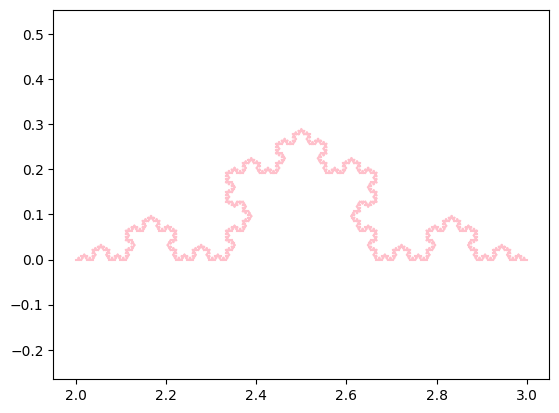

In [185]:
#this is the same method as image 2, so I put no "#"

image=5

initialpoints=[[x1,y1],[x2,y2]]  
dummypoints=[] 

#step 1 
for i in range(image): 
#step 2 
    for j in range(len(initialpoints)-1): 
        x1, y1 = initialpoints[j]
        x2, y2 = initialpoints[j + 1]
        x3 = (2*x1 + x2) / 3  
        y3 = (2*y1 + y2) / 3
        x5 = (x1  + 2*x2) / 3
        y5 = (y1 + 2*y2) / 3
        x4 = (x3 + x5) / 2 - math.sin(math.radians(60)) * (y5 - y3) 
        y4 = (y3 + y5) / 2 + math.sin(math.radians(60)) * (x5 - x3)
        dummypoints.append([x1,y1]) 
        dummypoints.append([x3,y3])
        dummypoints.append([x4,y4])
        dummypoints.append([x5,y5])
        dummypoints.append([x2,y2]) 
    initialpoints= dummypoints 
    dummypoints=[] 

#step 3
for k in range(len(initialpoints)-1): 
    plt.plot([initialpoints[k][0],initialpoints[k+1][0]],[initialpoints[k][1],initialpoints[k+1][1]], color= "pink") 
plt.axis('equal')
plt.show()

## Question 2.2 (The Heighway Dragon)

### Image 1

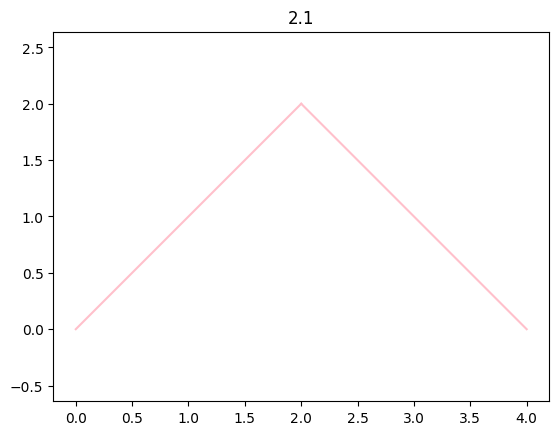

In [188]:

#step 1 : drawing a line between 3 points 

x1=0
y1=0
x2=4
y2=0
x3= 2
y3= 2
points=[[x1,y1],[x3,y3],[x2,y2]]  

for k in range(len(points)-1): 
    plt.plot([points[k][0],points[k+1][0]],[points[k][1],points[k+1][1]], "pink") #the format of points is now drawable so i change it like that:

plt.axis('equal')
plt.title("2.1")
plt.show()



### Image 2

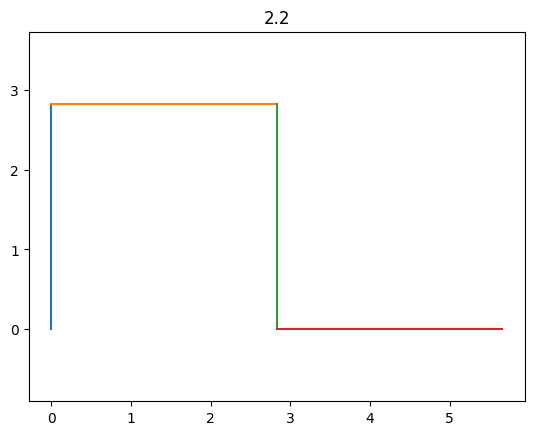

In [189]:
#step 1 : drawing a line between 3 points 

x1=0
y1=0
x2=4
y2=0
x3= 2
y3= 2
points=[[x1,y1],[x3,y3],[x2,y2]]  

#rotation properties
theta = 45
R= np.array([[math.cos(math.radians(theta)), math.sin(math.radians(theta))], [-math.sin(math.radians(theta)), math.cos(math.radians(theta))]]) #rotation matrix


step = 1 #the number of the times the whole proccess is repeated
newpoints=[] #this method is explained before
for l in range (step):
#step 2 : rotating the step 1 image
    for i in range(len(points)): 
        f= np.array(points[i]) 
        D= f @ R
        newpoints.append(D)
#step 3 :progressing the pic one step further (making the same lines but rotated)
    for j in range(len(points)-1): 
        if j +1 < len(points)/2 : 
            anghezix= -(newpoints[j+1][0] - newpoints[j][0]) + newpoints[-1][0] #taking the first and second points and finding their distant so we can take the last point and add that to it
            angheziy= -(newpoints[j+1][1] - newpoints[j][1]) + newpoints[-1][1]
            newpoints.append([anghezix,angheziy])
        else :
            anghezix= (newpoints[j+1][0] - newpoints[j][0]) + newpoints[-1][0]
            angheziy= (newpoints[j+1][1] - newpoints[j][1]) + newpoints[-1][1]
            newpoints.append([anghezix,angheziy])
    points=newpoints
    newpoints=[]


#step 4: plotting
for k in range(len(points)-1): 
    plt.plot([points[k][0],points[k+1][0]],[points[k][1],points[k+1][1]]) #the format of points is now drawable so i change it like that:

plt.axis('equal')
plt.title("2.2")
plt.show()


### Image 3

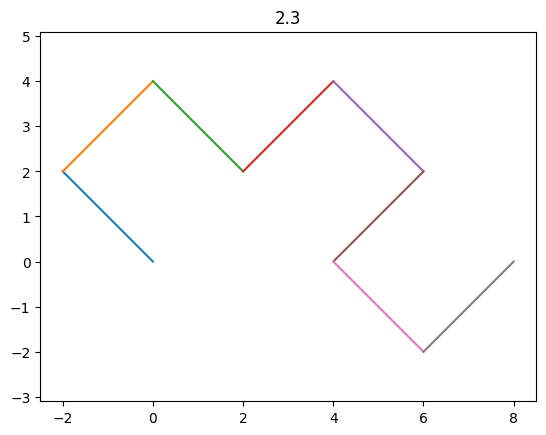

In [190]:
#step 1 : drawing a line between 3 points 

x1=0
y1=0
x2=4
y2=0
x3= 2
y3= 2
points=[[x1,y1],[x3,y3],[x2,y2]]  

#rotation properties
theta = 45
R= np.array([[math.cos(math.radians(theta)), math.sin(math.radians(theta))], [-math.sin(math.radians(theta)), math.cos(math.radians(theta))]]) #rotation matrix


step = 2 #the number of the times the whole proccess is repeated
newpoints=[] #this method is explained before
for l in range (step):
#step 2 : rotating the step 1 image
    for i in range(len(points)): 
        f= np.array(points[i]) 
        D= f @ R
        newpoints.append(D)
#step 3 :progressing the pic one step further (making the same lines but rotated)
    for j in range(len(points)-1): 
        if j +1 < len(points)/2 : 
            anghezix= -(newpoints[j+1][0] - newpoints[j][0]) + newpoints[-1][0] #taking the first and second points and finding their distant so we can take the last point and add that to it
            angheziy= -(newpoints[j+1][1] - newpoints[j][1]) + newpoints[-1][1]
            newpoints.append([anghezix,angheziy])
        else :
            anghezix= (newpoints[j+1][0] - newpoints[j][0]) + newpoints[-1][0]
            angheziy= (newpoints[j+1][1] - newpoints[j][1]) + newpoints[-1][1]
            newpoints.append([anghezix,angheziy])
    points=newpoints
    newpoints=[]


#step 4: plotting
for k in range(len(points)-1): 
    plt.plot([points[k][0],points[k+1][0]],[points[k][1],points[k+1][1]]) #the format of points is now drawable so i change it like that:

plt.axis('equal')
plt.title("2.3")

plt.show()


### Image 4

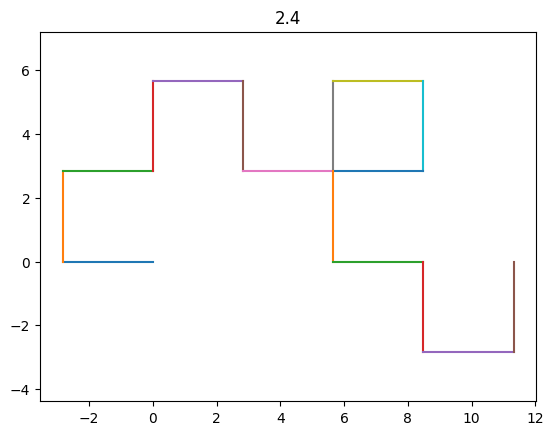

In [191]:
#step 1 : drawing a line between 3 points 

x1=0
y1=0
x2=4
y2=0
x3= 2
y3= 2
points=[[x1,y1],[x3,y3],[x2,y2]]  

#rotation properties
theta = 45
R= np.array([[math.cos(math.radians(theta)), math.sin(math.radians(theta))], [-math.sin(math.radians(theta)), math.cos(math.radians(theta))]]) #rotation matrix


step = 3 #the number of the times the whole proccess is repeated
newpoints=[] #this method is explained before
for l in range (step):
#step 2 : rotating the step 1 image
    for i in range(len(points)): 
        f= np.array(points[i]) 
        D= f @ R
        newpoints.append(D)
#step 3 :progressing the pic one step further (making the same lines but rotated)
    for j in range(len(points)-1): 
        if j +1 < len(points)/2 : 
            anghezix= -(newpoints[j+1][0] - newpoints[j][0]) + newpoints[-1][0] #taking the first and second points and finding their distant so we can take the last point and add that to it
            angheziy= -(newpoints[j+1][1] - newpoints[j][1]) + newpoints[-1][1]
            newpoints.append([anghezix,angheziy])
        else :
            anghezix= (newpoints[j+1][0] - newpoints[j][0]) + newpoints[-1][0]
            angheziy= (newpoints[j+1][1] - newpoints[j][1]) + newpoints[-1][1]
            newpoints.append([anghezix,angheziy])
    points=newpoints
    newpoints=[]


#step 4: plotting
for k in range(len(points)-1): 
    plt.plot([points[k][0],points[k+1][0]],[points[k][1],points[k+1][1]]) #the format of points is now drawable so i change it like that:

plt.axis('equal')
plt.title("2.4")
plt.show()


### Image 6

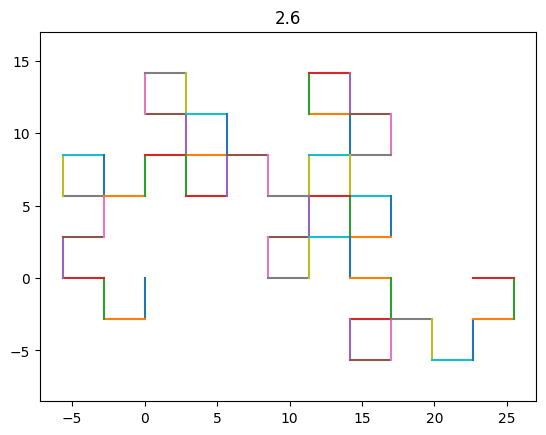

In [192]:
#step 1 : drawing a line between 3 points 

x1=0
y1=0
x2=4
y2=0
x3= 2
y3= 2
points=[[x1,y1],[x3,y3],[x2,y2]]  

#rotation properties
theta = 45
R= np.array([[math.cos(math.radians(theta)), math.sin(math.radians(theta))], [-math.sin(math.radians(theta)), math.cos(math.radians(theta))]]) #rotation matrix


step = 5 #the number of the times the whole proccess is repeated
newpoints=[] #this method is explained before
for l in range (step):
#step 2 : rotating the step 1 image
    for i in range(len(points)): 
        f= np.array(points[i]) 
        D= f @ R
        newpoints.append(D)
#step 3 :progressing the pic one step further (making the same lines but rotated)
    for j in range(len(points)-1): 
        if j +1 < len(points)/2 : 
            anghezix= -(newpoints[j+1][0] - newpoints[j][0]) + newpoints[-1][0] #taking the first and second points and finding their distant so we can take the last point and add that to it
            angheziy= -(newpoints[j+1][1] - newpoints[j][1]) + newpoints[-1][1]
            newpoints.append([anghezix,angheziy])
        else :
            anghezix= (newpoints[j+1][0] - newpoints[j][0]) + newpoints[-1][0]
            angheziy= (newpoints[j+1][1] - newpoints[j][1]) + newpoints[-1][1]
            newpoints.append([anghezix,angheziy])
    points=newpoints
    newpoints=[]


#step 4: plotting
for k in range(len(points)-1): 
    plt.plot([points[k][0],points[k+1][0]],[points[k][1],points[k+1][1]]) #the format of points is now drawable so i change it like that:

plt.axis('equal')
plt.title("2.6")
plt.show()


### Image 10

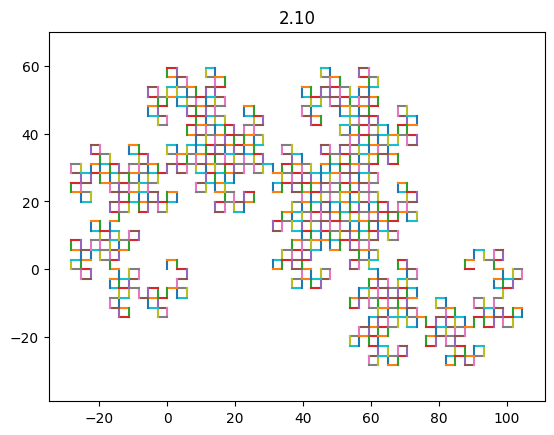

In [193]:
#step 1 : drawing a line between 3 points 

x1=0
y1=0
x2=4
y2=0
x3= 2
y3= 2
points=[[x1,y1],[x3,y3],[x2,y2]]  

#rotation properties
theta = 45
R= np.array([[math.cos(math.radians(theta)), math.sin(math.radians(theta))], [-math.sin(math.radians(theta)), math.cos(math.radians(theta))]]) #rotation matrix


step = 9 #the number of the times the whole proccess is repeated
newpoints=[] #this method is explained before
for l in range (step):
#step 2 : rotating the step 1 image
    for i in range(len(points)): 
        f= np.array(points[i]) 
        D= f @ R
        newpoints.append(D)
#step 3 :progressing the pic one step further (making the same lines but rotated)
    for j in range(len(points)-1): 
        if j +1 < len(points)/2 : 
            anghezix= -(newpoints[j+1][0] - newpoints[j][0]) + newpoints[-1][0] #taking the first and second points and finding their distant so we can take the last point and add that to it
            angheziy= -(newpoints[j+1][1] - newpoints[j][1]) + newpoints[-1][1]
            newpoints.append([anghezix,angheziy])
        else :
            anghezix= (newpoints[j+1][0] - newpoints[j][0]) + newpoints[-1][0]
            angheziy= (newpoints[j+1][1] - newpoints[j][1]) + newpoints[-1][1]
            newpoints.append([anghezix,angheziy])
    points=newpoints
    newpoints=[]


#step 4: plotting
for k in range(len(points)-1): 
    plt.plot([points[k][0],points[k+1][0]],[points[k][1],points[k+1][1]]) #the format of points is now drawable so i change it like that:

plt.axis('equal')
plt.title("2.10")
plt.show()


### Image 15

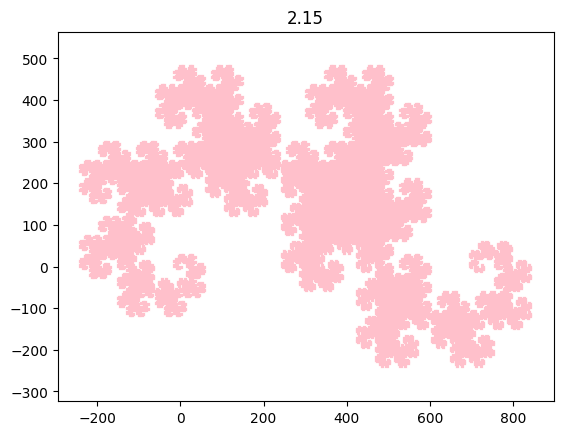

In [194]:
#step 1 : drawing a line between 3 points 

x1=0
y1=0
x2=4
y2=0
x3= 2
y3= 2
points=[[x1,y1],[x3,y3],[x2,y2]]  

#rotation properties
theta = 45
R= np.array([[math.cos(math.radians(theta)), math.sin(math.radians(theta))], [-math.sin(math.radians(theta)), math.cos(math.radians(theta))]]) #rotation matrix


step = 15 #the number of the times the whole proccess is repeated
newpoints=[] #this method is explained before
for l in range (step):
#step 2 : rotating the step 1 image
    for i in range(len(points)): 
        f= np.array(points[i]) 
        D= f @ R
        newpoints.append(D)
#step 3 :progressing the pic one step further (making the same lines but rotated)
    for j in range(len(points)-1): 
        if j +1 < len(points)/2 : 
            anghezix= -(newpoints[j+1][0] - newpoints[j][0]) + newpoints[-1][0] #taking the first and second points and finding their distant so we can take the last point and add that to it
            angheziy= -(newpoints[j+1][1] - newpoints[j][1]) + newpoints[-1][1]
            newpoints.append([anghezix,angheziy])
        else :
            anghezix= (newpoints[j+1][0] - newpoints[j][0]) + newpoints[-1][0]
            angheziy= (newpoints[j+1][1] - newpoints[j][1]) + newpoints[-1][1]
            newpoints.append([anghezix,angheziy])
    points=newpoints
    newpoints=[]


#step 4: plotting
for k in range(len(points)-1): 
    plt.plot([points[k][0],points[k+1][0]],[points[k][1],points[k+1][1]], color = "pink") #the format of points is now drawable so i change it like that:

plt.axis('equal')
plt.title("2.15")
plt.show()


## Question 2.3 (Sierpinski Triangle)

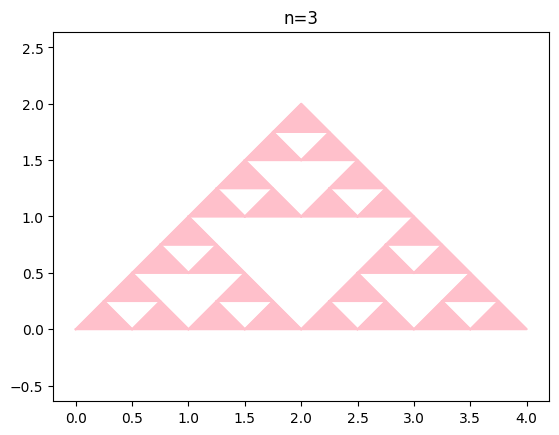

In [202]:
# for this method I got my idea from the instructor's explanation(Dr.Ejtehady) at class
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate 
import math

#step 1 : taking 3 points and make a triangle
x1=0
y1=0
x2=4
y2=0
x3= 2
y3= 2

#step 2 : reduce its size by 1/2 in a way that they make a one step sierpensku triangle (by choosing the coordinates wisely) so we need 3 of these triangles
pointsx= [[x1,x2,x3]]
pointsy= [[y1,y2,y3]]
newxpoints = []
newypoints = []
X=[]
Y= []

step=3
for m in range(step):
    for j in range(len(pointsx)):
        for k in range (len(pointsx[j])):
            for n in range(len(pointsx[j])):
                x= (pointsx[j][k]+pointsx[j][n])/2
                y= (pointsy[j][k]+pointsy[j][n])/2
                newxpoints.append(x)
                newypoints.append(y)
            X.append(newxpoints)
            Y.append(newypoints)
            newxpoints = []
            newypoints = []
    pointsx = X
    pointsy = Y
    X = []
    Y = []

#step 3 : plotting
for l in range(len(pointsy)):
    plt.plot(pointsx[l]+pointsx[l][0:1],pointsy[l]+pointsy[l][0:1],color='pink')
    plt.fill(pointsx[l]+pointsx[l][0:1],pointsy[l]+pointsy[l][0:1], color='pink')

plt.axis('equal')
plt.title("n=3")

plt.show()



## Question 2.4 (Pascal Triangle)

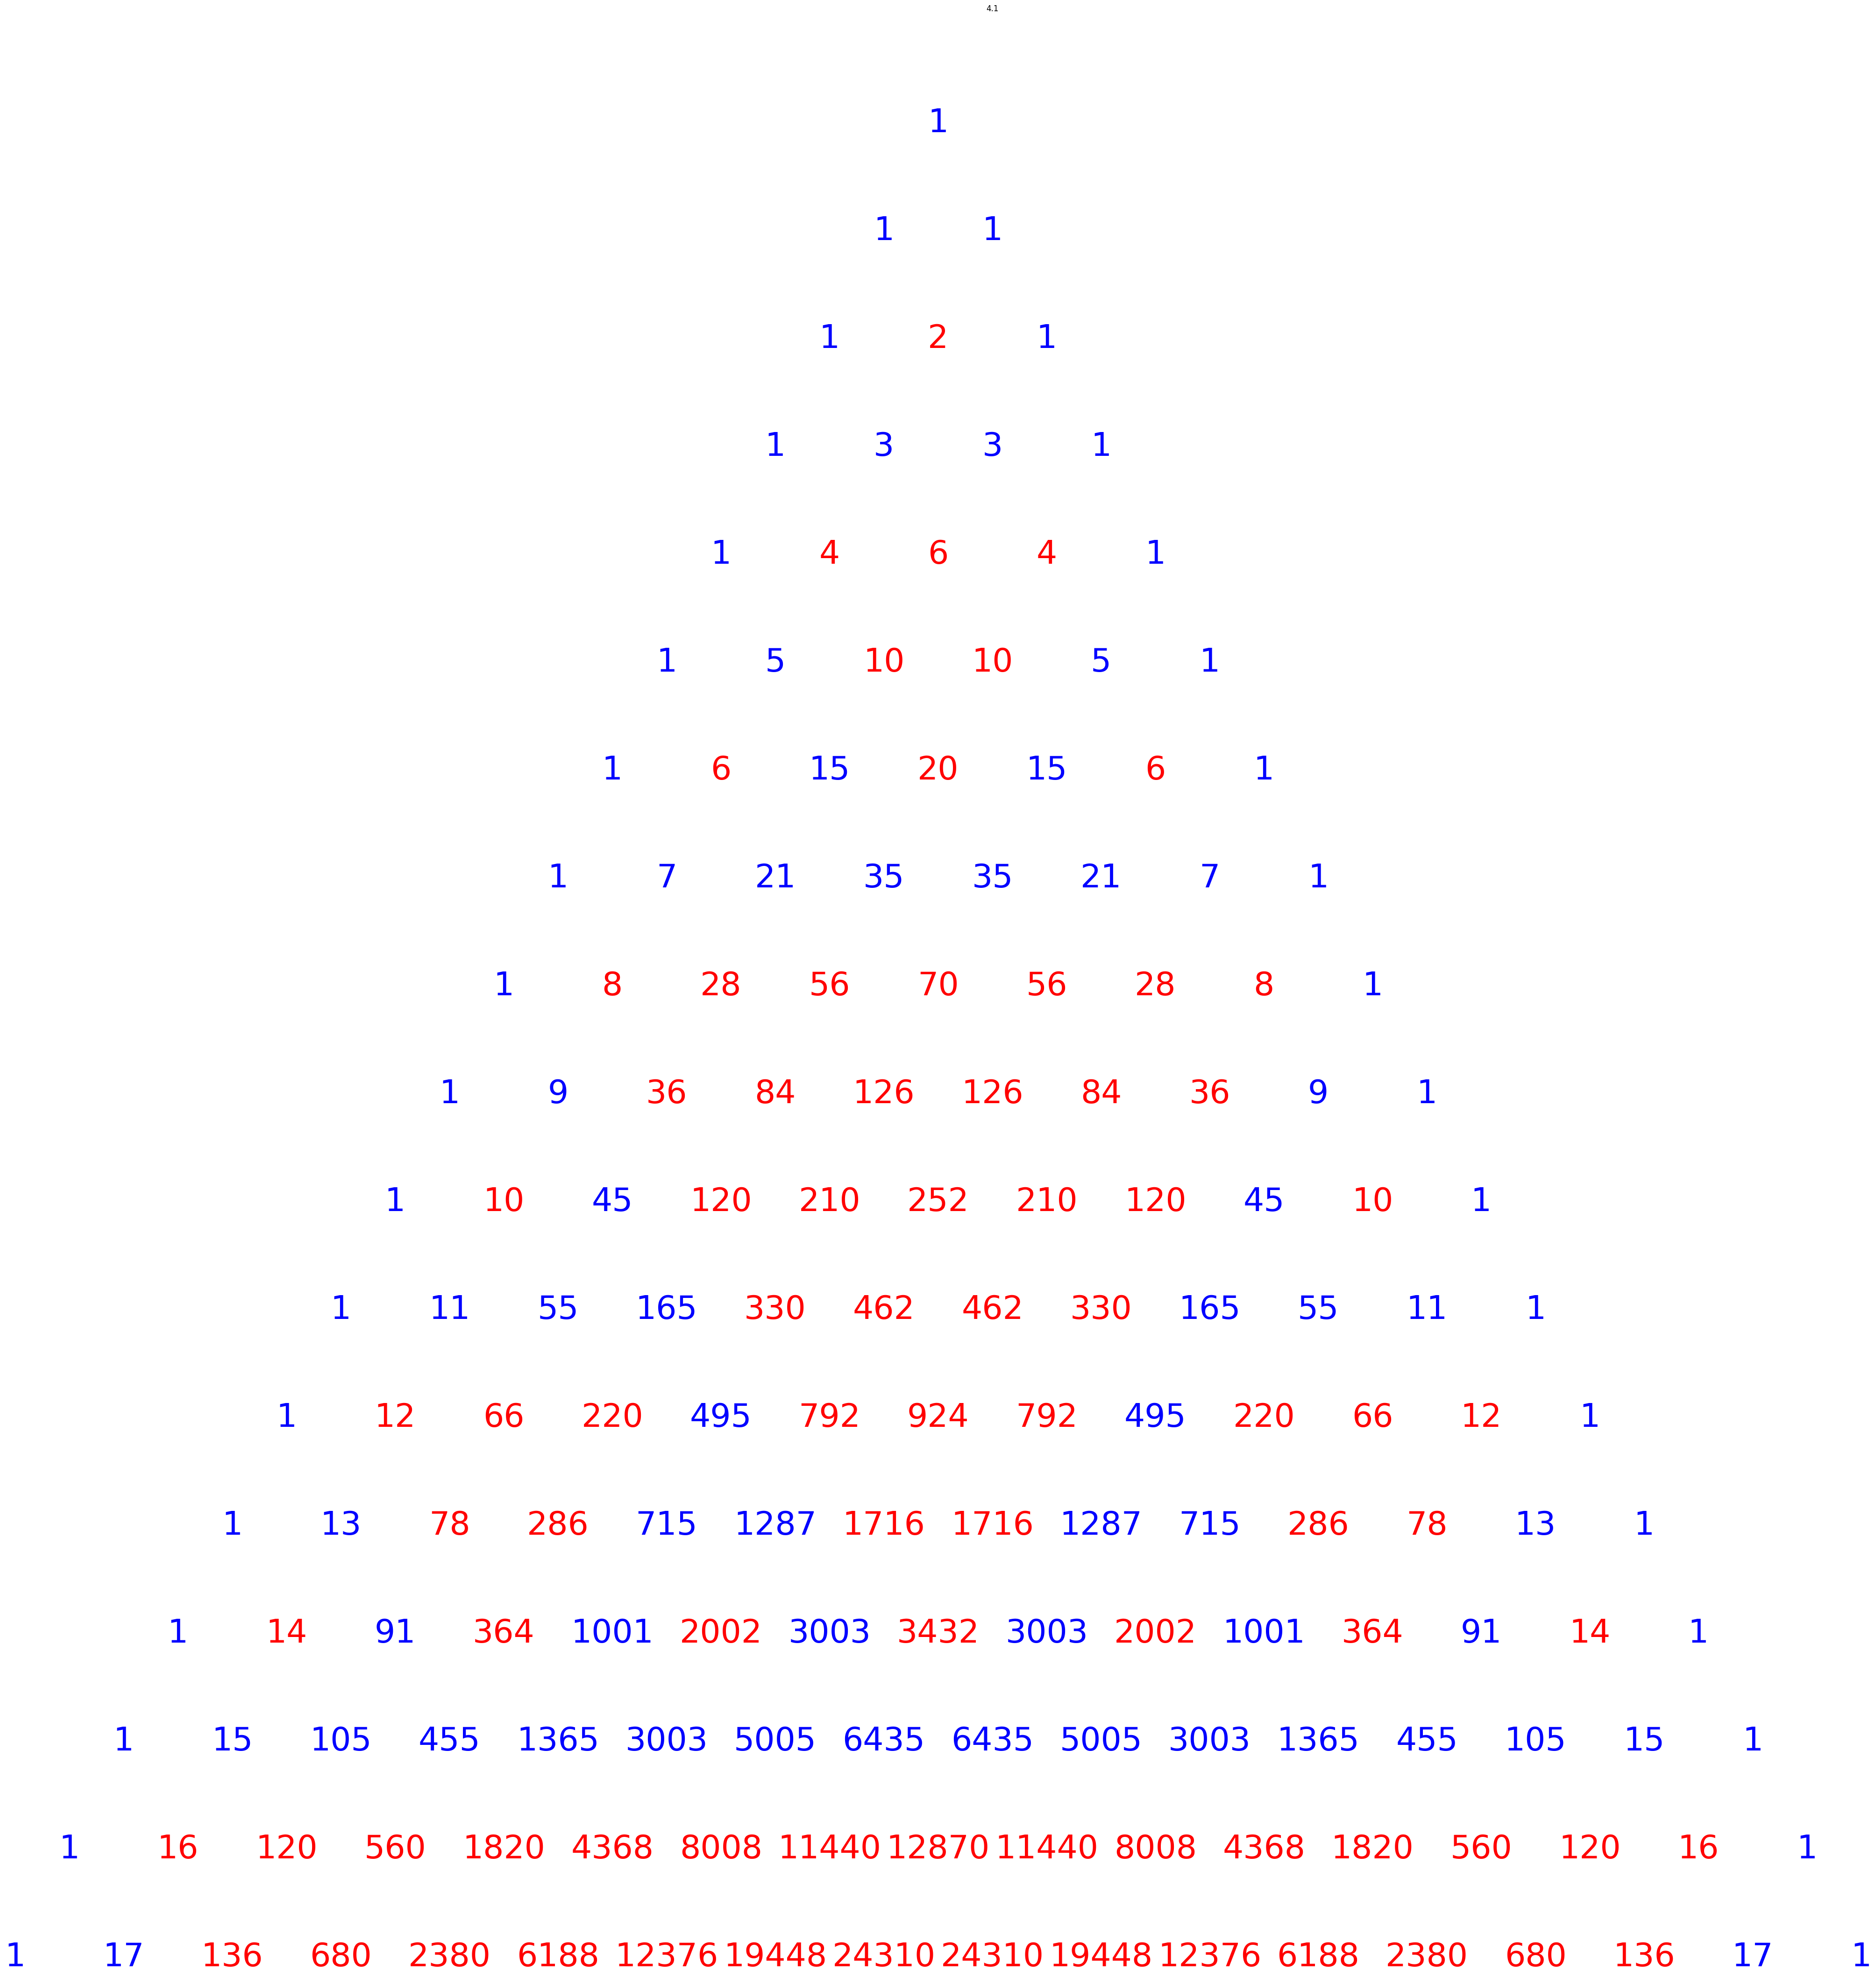

In [196]:
import numpy as np
import matplotlib.pyplot as plt

n = 18  #the number of the rows
#step 1: making the numbers of the pascal triangle by its formula
def pascal(n):
    triangle = np.zeros((n, n), dtype=int)  
    for i in range(n):
        triangle[i][0] = 1  
        for j in range(1, i + 1):
            triangle[i][j] = triangle[i-1][j-1] + triangle[i-1][j]  
    return triangle

#step 2: coloring the even and odd numbers so it will make a Sierpinski visually
def coloringpascal(n):
    triangle = pascal(n)  #list of the numbers
    fig, ax = plt.subplots(figsize=(3, 3)) #drawing figure and axis
    for i in range(n):
        for j in range(i + 1):  
            if triangle[i][j] % 2 != 0:
                color = 'blue'  #even numbers
            else:
                color = 'red'   #odd numbers
            ax.text(-j+i/2, -i, str(triangle[i][j]), ha='center', va='center', fontsize=50, color=color) #ha and va put the numbers at the center of the plane
    plt.axis('off')
    plt.show()
coloringpascal(n)


## Question 2.5 (Sierpinski Triangle with Self-similar function)

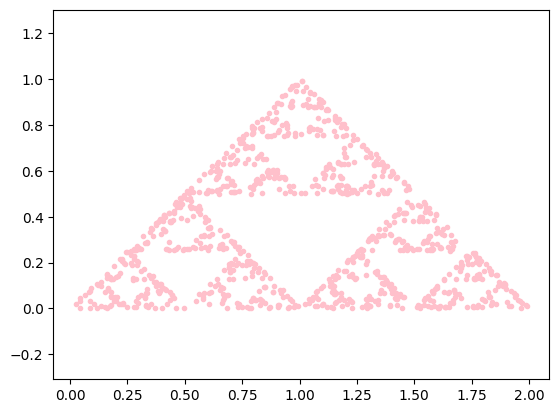

In [94]:
# we choose three points in our mind that make a equilletheral triangle: [0,0],[2,0],[1,1] then we will choose a random number and do our functions based on these points
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate 
import math

#step 1 : defining  the functions
def step1 (x1,y1):
    return ((x1+0)/2,(y1+0)/2)

def step2 (x1,y1):
    newx=(x1+2)/2
    newy=(y1+0)/2
    return (newx,newy)

def step3 (x1,y1):
    xnew=(x1+1)/2
    ynew=(y1+1)/2
    return (xnew,ynew)


#step2: choosing a random number and doing the funcs p times on it, then repeating the process "s" times
p=11
s= 1000
for i in range (s):
    randfloat=np.random.rand(2)
    randint=np.random.randint(1,10,size=2)
    coordinates= randint+randfloat
    for j in range (p):
        randnum=np.random.randint(1,4,size=1)
        if randnum == 1:
            coordinates=step1(coordinates[0],coordinates[1])
        if randnum == 2:
            coordinates=step2(coordinates[0],coordinates[1])
        if randnum == 3:
            coordinates=step3(coordinates[0],coordinates[1])
    plt.plot(coordinates[0],coordinates[1],marker="o",markersize=3,color='pink')


#step: plotting
plt.axis('equal')
plt.show()


## Question 2.6 (Barnsley Fern)

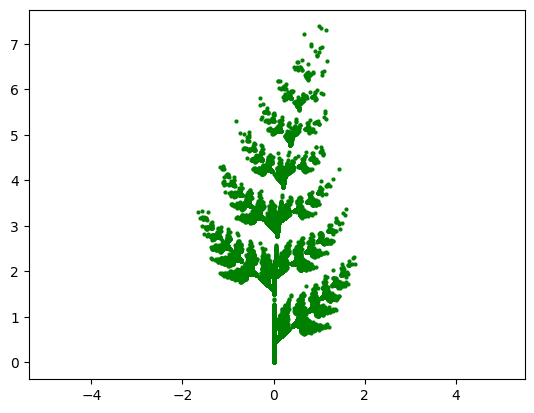

In [122]:
#this is the same proccess as 2.5 but with different functions (this time we have step4 because it make the other half of the leaf (it's a rotation))
import numpy as np
import matplotlib.pyplot as plt


#step 1: making the functions
#all the numbers in this part has been found by barnsley empirically and then slightly changed by me for a better visualization (based on experiments)

#making the stem: squishing the y axis toward the stem (so it will be more like a line)
def step1(x, y):
    return (0, 0.20*y) 

#growing the whole thing up with translation
def step2(x, y):
    return (0.85*x+0.05*y, -0.05*x+0.85*y+1.5)

#left leaves: making the leaf especially the apex 
def step3(x, y):
    return (0.2*x-0.25*y, 0.23*x+0.22*y+1.5)

#right leaves: rotating the step 3
def step4(x, y):
    return (-0.15*x+0.28*y, 0.25*x+0.25*y+0.45)




#step2: choosing a random number and doing the funcs "p" times on it, then repeating this process "s" times 
p=100
s= 100000
for i in range (s):
    randfloat=np.random.rand(2)
    randint=np.random.randint(1,100,size=2)
    coordinates= randint+randfloat
    for j in range (p):
        randnum=np.random.randint(1,5,size=1)
        if randnum == 1:
            coordinates=step1(coordinates[0],coordinates[1])
        if randnum == 2:
            coordinates=step2(coordinates[0],coordinates[1])
        if randnum == 3:
            coordinates=step3(coordinates[0],coordinates[1])
        if randnum == 4:
            coordinates=step4(coordinates[0],coordinates[1])
    plt.plot(coordinates[0],coordinates[1],marker="o",markersize=2,color='green')


#step: plotting
plt.axis('equal')
plt.show()

## Question 2.7 (Julia Set)

### Image c= -0.4-0.6i

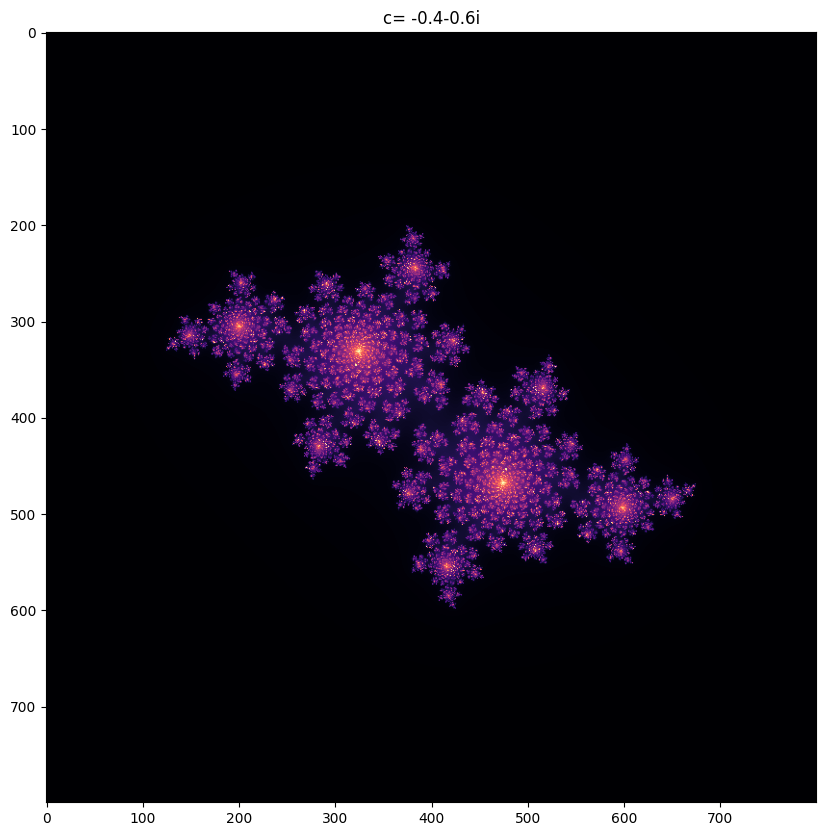

In [131]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


#step 1: defining a function that does the julia equation
def juliaequation(zx, zy, cx, cy, threshold):
    z = complex(zx, zy)     # initial conditions
    c = complex(cx, cy)
    for i in range(threshold): #making a threshold that Calculates if the number z with a constant c belongs to the Julia set
        z = z**2 + c
        if abs(z) > 4.:  # diverging
            return i
    return threshold - 1  # it didn't diverge



#step 2: making a complex plane
xstart, ystart = -2, -2  # starting points
width, height = 4, 4  # for 3 units to the left and to the right
pixel = 200  # how many pixles per unit
real = np.linspace(xstart, xstart+width, width*pixel )  # real axis
imaginary = np.linspace(ystart, ystart+height, height*pixel)  # imaginary axis

X = np.empty((len(real), len(imaginary)))  # emptying each pixel so it can be filled after



#step 3: making the given c understandable for our code  (as c = x + i*y = -0.4+0.6i )  

cx, cy = -0.4, -0.6


#step 4: fill the image with the number of interations
threshold = 300  # max allowed iterations
for i in range(len(real)):
    for j in range(len(imaginary)):
        X[i, j] = juliaequation(zx=real[i], zy=imaginary[j], cx=cx, cy=cy, threshold=threshold)  



#step 5: plotting
plt.figure(figsize=(10, 10)) #make the whole pic bigger (visually)
ax = plt.axes() 
ax.imshow(X.T, cmap='magma')
plt.title("c= -0.4-0.6i")
plt.show()


### Image c=-i

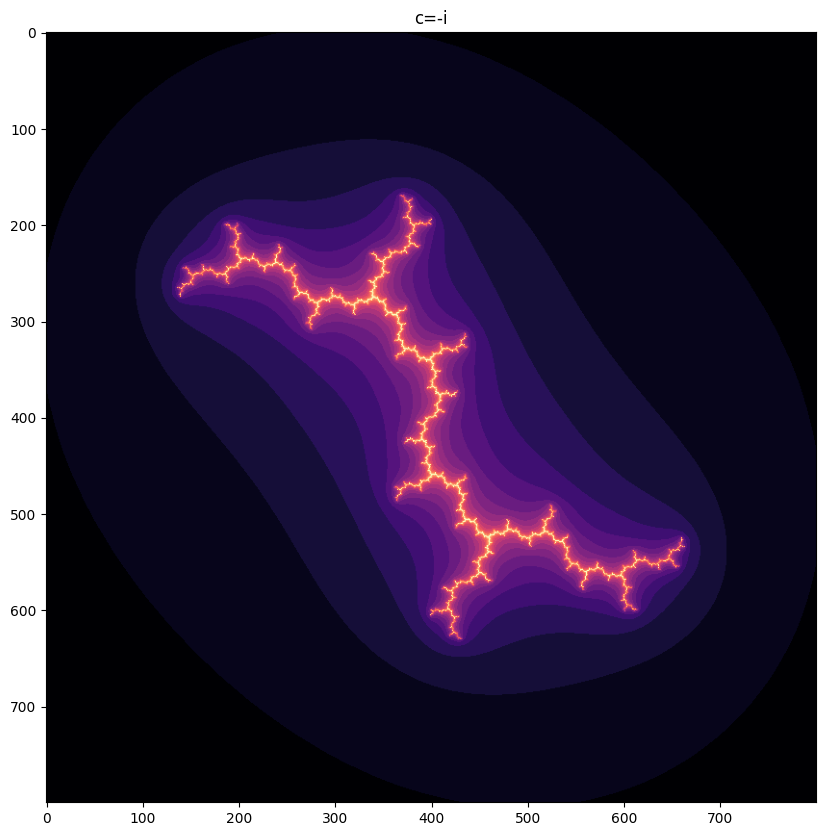

In [134]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


#step 1: defining a function that does the julia equation
def juliaequation(zx, zy, cx, cy, threshold):
    z = complex(zx, zy)     # initial conditions
    c = complex(cx, cy)
    for i in range(threshold): #making a threshold that Calculates if the number z with a constant c belongs to the Julia set
        z = z**2 + c
        if abs(z) > 4.:  # diverging
            return i
    return threshold - 1  # it didn't diverge



#step 2: making a complex plane
xstart, ystart = -2, -2  # starting points
width, height = 4, 4  # for 3 units to the left and to the right
pixel = 200  # how many pixles per unit
real = np.linspace(xstart, xstart+width, width*pixel )  # real axis
imaginary = np.linspace(ystart, ystart+height, height*pixel)  # imaginary axis

X = np.empty((len(real), len(imaginary)))  # emptying each pixel so it can be filled after



#step 3: making the given c understandable for our code  (as c = rcos(a) + i rsin(a) = re^(ia) = -i )  
r = 1
a = 3*(math.pi)/2. 
cx, cy = 0, r*math.sin(a)



#step 4: fill the image with the number of interations
threshold = 20  # max allowed iterations
for i in range(len(real)):
    for j in range(len(imaginary)):
        X[i, j] = juliaequation(zx=real[i], zy=imaginary[j], cx=cx, cy=cy, threshold=threshold)  



#step 5: plotting
plt.figure(figsize=(10, 10)) #make the whole pic bigger (visually)
ax = plt.axes() 
ax.imshow(X.T, cmap='magma')
plt.title("c=-i")
plt.show()


### Image c= -0.12-0.75i

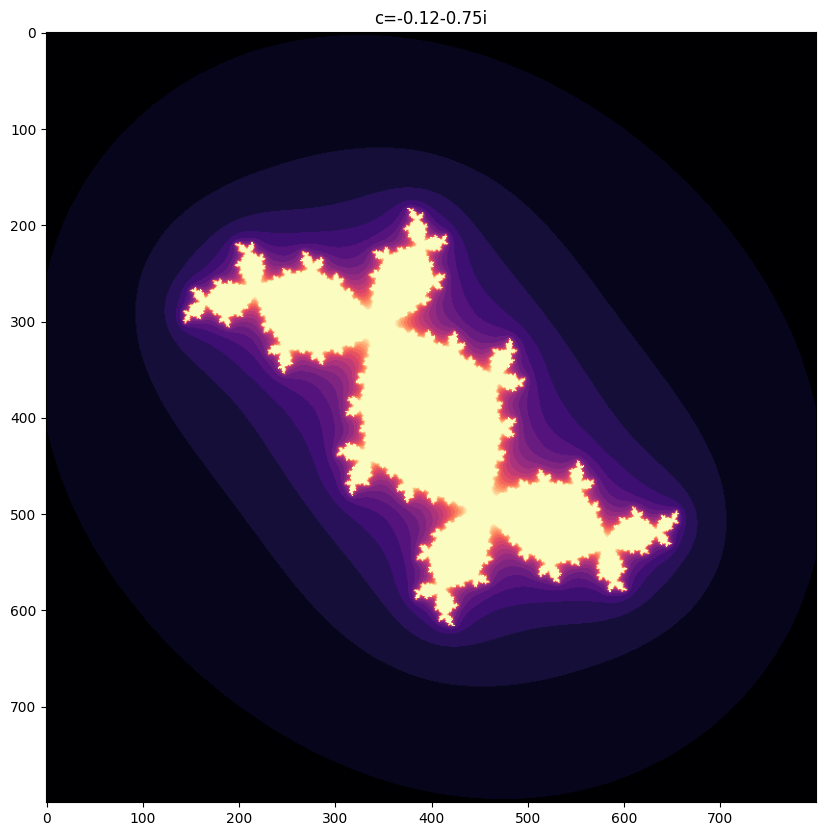

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


#step 1: defining a function that does the julia equation
def juliaequation(zx, zy, cx, cy, threshold):
    z = complex(zx, zy)     # initial conditions
    c = complex(cx, cy)
    for i in range(threshold): #making a threshold that Calculates if the number z with a constant c belongs to the Julia set
        z = z**2 + c
        if abs(z) > 4.:  # diverging
            return i
    return threshold - 1  # it didn't diverge



#step 2: making a complex plane
xstart, ystart = -2, -2  # starting points
width, height = 4, 4  # for 3 units to the left and to the right
pixel = 200  # how many pixles per unit
real = np.linspace(xstart, xstart+width, width*pixel )  # real axis
imaginary = np.linspace(ystart, ystart+height, height*pixel)  # imaginary axis

X = np.empty((len(real), len(imaginary)))  # emptying each pixel so it can be filled after



#step 3: making the given c understandable for our code  (as c = x+iy = -0.12-0.75i )  

cx, cy = -0.12, -0.75



#step 4: fill the image with the number of interations
threshold = 20  # max allowed iterations
for i in range(len(real)):
    for j in range(len(imaginary)):
        X[i, j] = juliaequation(zx=real[i], zy=imaginary[j], cx=cx, cy=cy, threshold=threshold)  



#step 5: plotting
plt.figure(figsize=(10, 10)) #make the whole pic bigger (visually)
ax = plt.axes() 
ax.imshow(X.T, cmap='magma')
plt.title("c=-0.12-0.75i")
plt.show()


### Image c=-0.6 

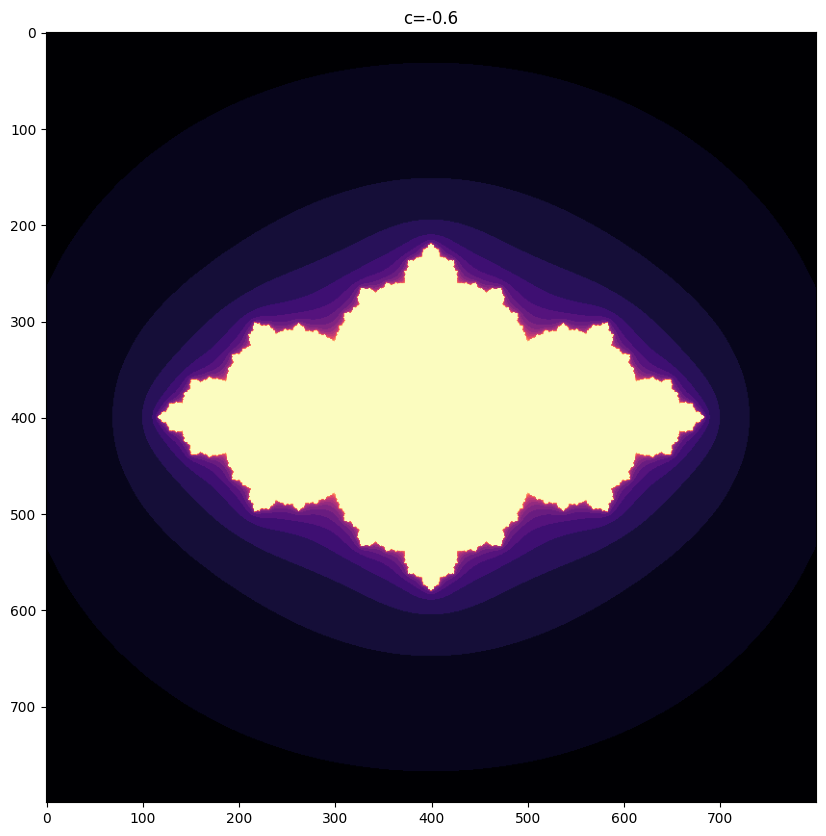

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


#step 1: defining a function that does the julia equation
def juliaequation(zx, zy, cx, cy, threshold):
    z = complex(zx, zy)     # initial conditions
    c = complex(cx, cy)
    for i in range(threshold): #making a threshold that Calculates if the number z with a constant c belongs to the Julia set
        z = z**2 + c
        if abs(z) > 4.:  # diverging
            return i
    return threshold - 1  # it didn't diverge



#step 2: making a complex plane
xstart, ystart = -2, -2  # starting points
width, height = 4, 4  # for 3 units to the left and to the right
pixel = 200  # how many pixles per unit
real = np.linspace(xstart, xstart+width, width*pixel )  # real axis
imaginary = np.linspace(ystart, ystart+height, height*pixel)  # imaginary axis

X = np.empty((len(real), len(imaginary)))  # emptying each pixel so it can be filled after



#step 3: making the given c understandable for our code  (as c = rcos(a) + i rsin(a) = re^(ia) = -0.6 )  
r = 0.6
a = math.pi
cx, cy = r*np.cos(a), 0



#step 4: fill the image with the number of interations
threshold = 20  # max allowed iterations
for i in range(len(real)):
    for j in range(len(imaginary)):
        X[i, j] = juliaequation(zx=real[i], zy=imaginary[j], cx=cx, cy=cy, threshold=threshold)  



#step 5: plotting
plt.figure(figsize=(10, 10)) #make the whole pic bigger (visually)
ax = plt.axes() 
ax.imshow(X.T, cmap='magma')
plt.title("c=-0.6")
plt.show()


### Image c= -0.8+ 0.16i

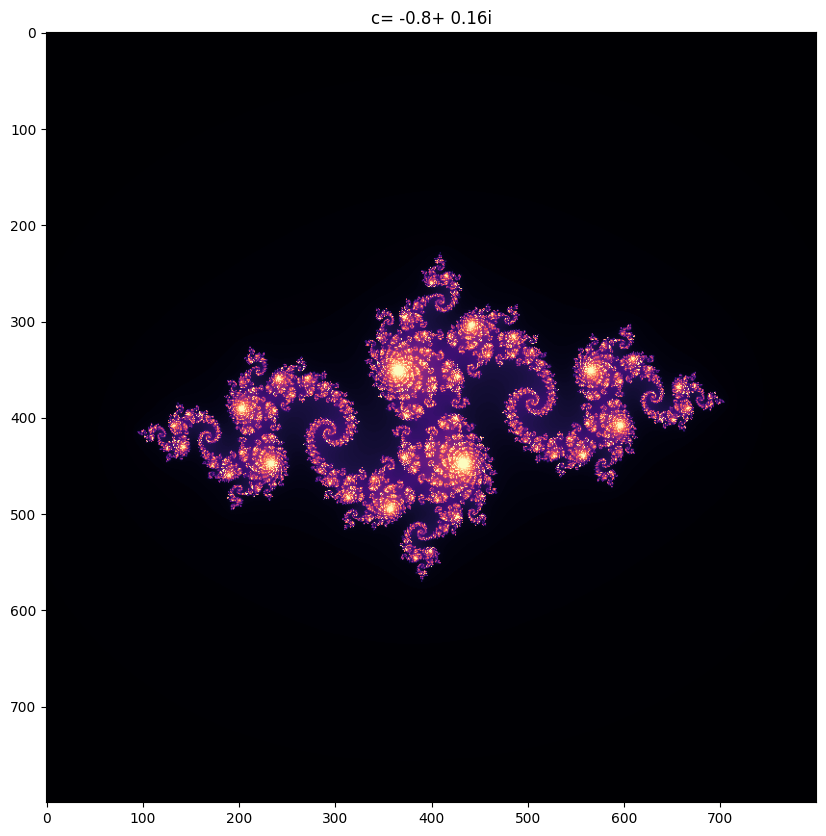

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


#step 1: defining a function that does the julia equation
def juliaequation(zx, zy, cx, cy, threshold):
    z = complex(zx, zy)     # initial conditions
    c = complex(cx, cy)
    for i in range(threshold): #making a threshold that Calculates if the number z with a constant c belongs to the Julia set
        z = z**2 + c
        if abs(z) > 4.:  # diverging
            return i
    return threshold - 1  # it didn't diverge



#step 2: making a complex plane
xstart, ystart = -2, -2  # starting points
width, height = 4, 4  # for 3 units to the left and to the right
pixel = 200  # how many pixles per unit
real = np.linspace(xstart, xstart+width, width*pixel )  # real axis
imaginary = np.linspace(ystart, ystart+height, height*pixel)  # imaginary axis

X = np.empty((len(real), len(imaginary)))  # emptying each pixel so it can be filled after



#step 3: making the given c understandable for our code  (as c = rcos(a) + i rsin(a) = re^(ia) = -0.8+ 0.16i )  

cx, cy = -0.8 , 0.16



#step 4: fill the image with the number of interations
threshold = 200  # max allowed iterations
for i in range(len(real)):
    for j in range(len(imaginary)):
        X[i, j] = juliaequation(zx=real[i], zy=imaginary[j], cx=cx, cy=cy, threshold=threshold)  



#step 5: plotting
plt.figure(figsize=(10, 10)) #make the whole pic bigger (visually)
ax = plt.axes() 
ax.imshow(X.T, cmap='magma')
plt.title("c= -0.8+ 0.16i")
plt.show()


### Image c= -0.4+0.6i

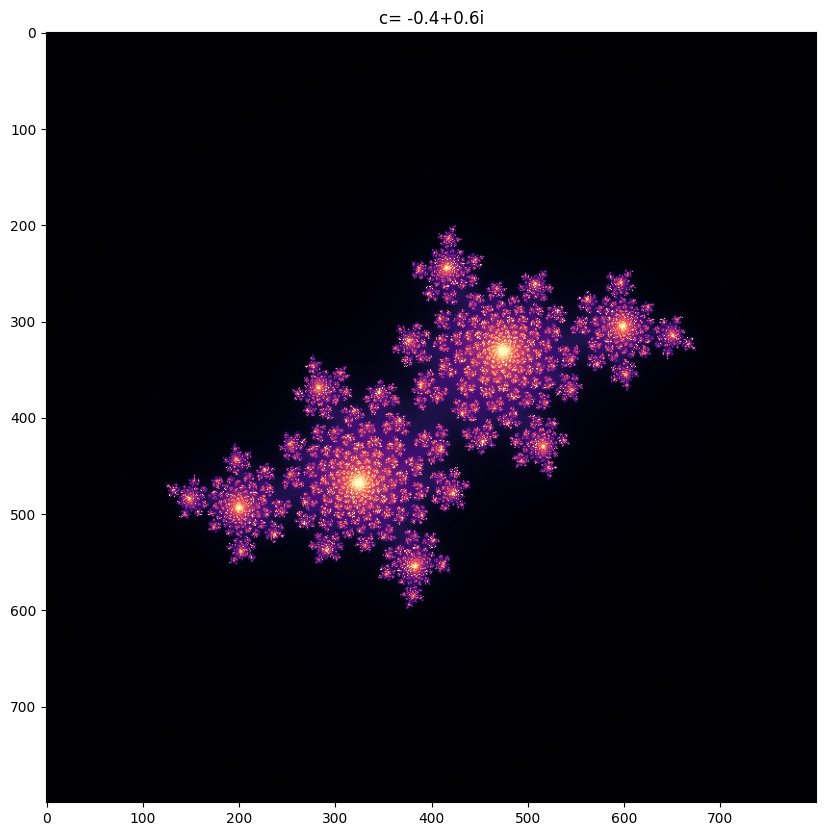

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


#step 1: defining a function that does the julia equation
def juliaequation(zx, zy, cx, cy, threshold):
    z = complex(zx, zy)     # initial conditions
    c = complex(cx, cy)
    for i in range(threshold): #making a threshold that Calculates if the number z with a constant c belongs to the Julia set
        z = z**2 + c
        if abs(z) > 4.:  # diverging
            return i
    return threshold - 1  # it didn't diverge



#step 2: making a complex plane
xstart, ystart = -2, -2  # starting points
width, height = 4, 4  # for 3 units to the left and to the right
pixel = 200  # how many pixles per unit
real = np.linspace(xstart, xstart+width, width*pixel )  # real axis
imaginary = np.linspace(ystart, ystart+height, height*pixel)  # imaginary axis

X = np.empty((len(real), len(imaginary)))  # emptying each pixel so it can be filled after



#step 3: making the given c understandable for our code  (as c = rcos(a) + i rsin(a) = re^(ia) = -0.4+0.6i )  

cx, cy = -0.4,0.6



#step 4: fill the image with the number of interations
threshold = 200  # max allowed iterations
for i in range(len(real)):
    for j in range(len(imaginary)):
        X[i, j] = juliaequation(zx=real[i], zy=imaginary[j], cx=cx, cy=cy, threshold=threshold)  



#step 5: plotting
plt.figure(figsize=(10, 10)) #make the whole pic bigger (visually)
ax = plt.axes() 
ax.imshow(X.T, cmap='magma')
plt.title("c= -0.4+0.6i")
plt.show()


### Other Images

#### Image -0.8+0.156i (produces a famous "rabbit" shape)

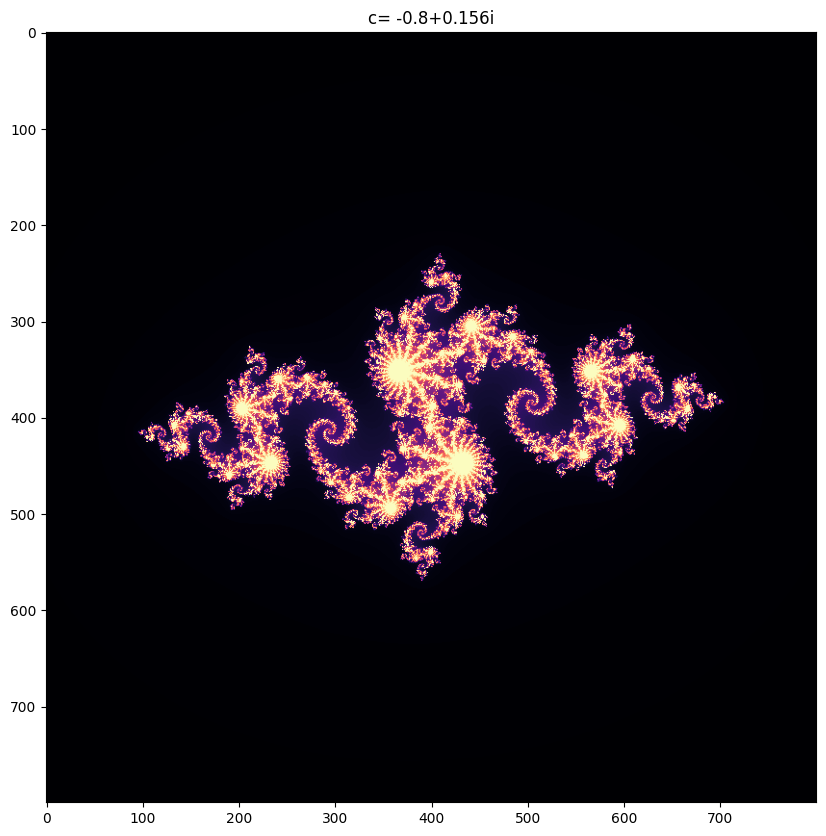

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


#step 1: defining a function that does the julia equation
def juliaequation(zx, zy, cx, cy, threshold):
    z = complex(zx, zy)     # initial conditions
    c = complex(cx, cy)
    for i in range(threshold): #making a threshold that Calculates if the number z with a constant c belongs to the Julia set
        z = z**2 + c
        if abs(z) > 4.:  # diverging
            return i
    return threshold - 1  # it didn't diverge



#step 2: making a complex plane
xstart, ystart = -2, -2  # starting points
width, height = 4, 4  # for 3 units to the left and to the right
pixel = 200  # how many pixles per unit
real = np.linspace(xstart, xstart+width, width*pixel )  # real axis
imaginary = np.linspace(ystart, ystart+height, height*pixel)  # imaginary axis

X = np.empty((len(real), len(imaginary)))  # emptying each pixel so it can be filled after



#step 3: making the given c understandable for our code  (as c = rcos(a) + i rsin(a) = re^(ia) = -0.8+0.156i  )  

cx, cy = -0.8, 0.156



#step 4: fill the image with the number of interations
threshold = 200  # max allowed iterations
for i in range(len(real)):
    for j in range(len(imaginary)):
        X[i, j] = juliaequation(zx=real[i], zy=imaginary[j], cx=cx, cy=cy, threshold=threshold)  



#step 5: plotting
plt.figure(figsize=(10, 10)) #make the whole pic bigger (visually)
ax = plt.axes() 
ax.imshow(X.T, cmap='magma')
plt.title("c= -0.8+0.156i")
plt.show()


#### Image c=0.285+0.01i (produces feathery structures)

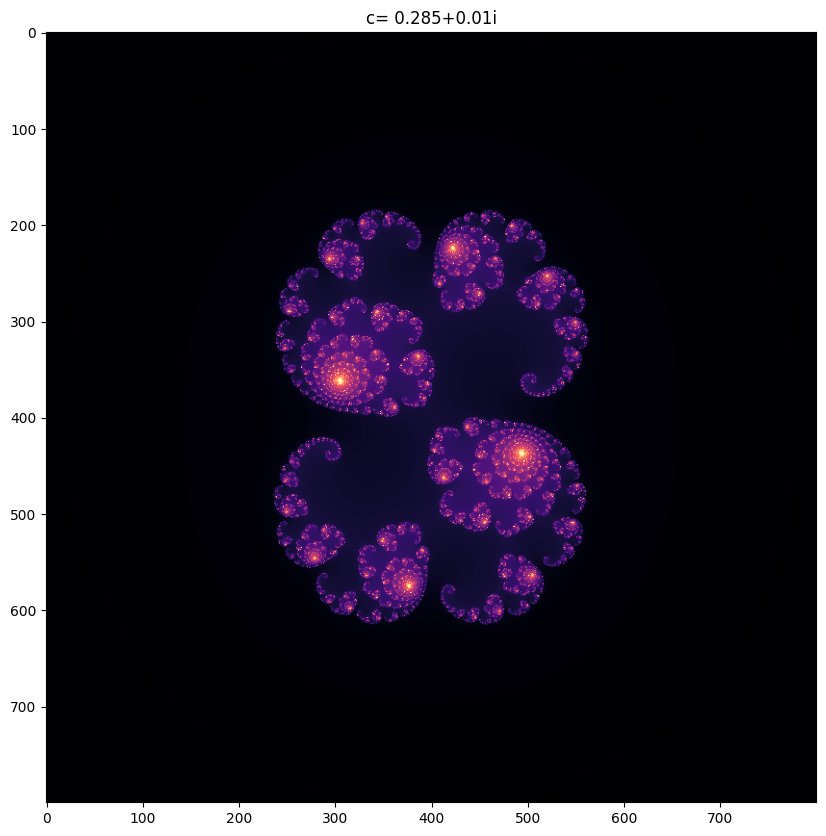

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


#step 1: defining a function that does the julia equation
def juliaequation(zx, zy, cx, cy, threshold):
    z = complex(zx, zy)     # initial conditions
    c = complex(cx, cy)
    for i in range(threshold): #making a threshold that Calculates if the number z with a constant c belongs to the Julia set
        z = z**2 + c
        if abs(z) > 4.:  # diverging
            return i
    return threshold - 1  # it didn't diverge



#step 2: making a complex plane
xstart, ystart = -2, -2  # starting points
width, height = 4, 4  # for 3 units to the left and to the right
pixel = 200  # how many pixles per unit
real = np.linspace(xstart, xstart+width, width*pixel )  # real axis
imaginary = np.linspace(ystart, ystart+height, height*pixel)  # imaginary axis

X = np.empty((len(real), len(imaginary)))  # emptying each pixel so it can be filled after



#step 3: making the given c understandable for our code  (as c = rcos(a) + i rsin(a) = re^(ia) = 0.285+0.01i )  

cx, cy = 0.285,0.01



#step 4: fill the image with the number of interations
threshold = 200  # max allowed iterations
for i in range(len(real)):
    for j in range(len(imaginary)):
        X[i, j] = juliaequation(zx=real[i], zy=imaginary[j], cx=cx, cy=cy, threshold=threshold)  



#step 5: plotting
plt.figure(figsize=(10, 10)) #make the whole pic bigger (visually)
ax = plt.axes() 
ax.imshow(X.T, cmap='magma')
plt.title("c= 0.285+0.01i")
plt.show()


####  Image c=−0.75+0.11i (creates a nebula-like shape)

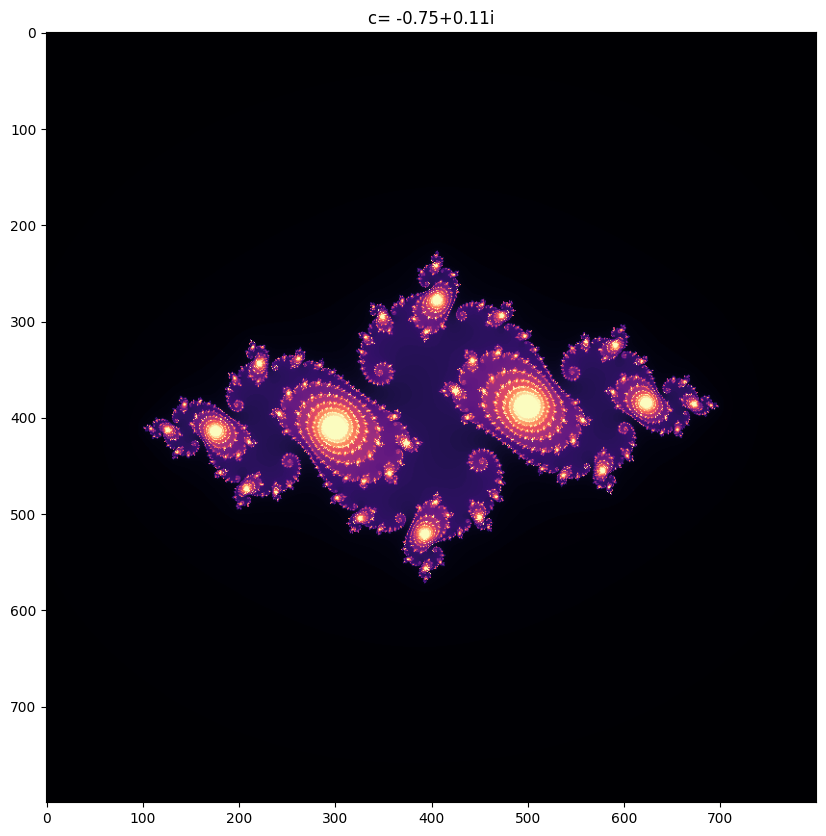

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


#step 1: defining a function that does the julia equation
def juliaequation(zx, zy, cx, cy, threshold):
    z = complex(zx, zy)     # initial conditions
    c = complex(cx, cy)
    for i in range(threshold): #making a threshold that Calculates if the number z with a constant c belongs to the Julia set
        z = z**2 + c
        if abs(z) > 4.:  # diverging
            return i
    return threshold - 1  # it didn't diverge



#step 2: making a complex plane
xstart, ystart = -2, -2  # starting points
width, height = 4, 4  # for 3 units to the left and to the right
pixel = 200  # how many pixles per unit
real = np.linspace(xstart, xstart+width, width*pixel )  # real axis
imaginary = np.linspace(ystart, ystart+height, height*pixel)  # imaginary axis

X = np.empty((len(real), len(imaginary)))  # emptying each pixel so it can be filled after



#step 3: making the given c understandable for our code  (as c = rcos(a) + i rsin(a) = re^(ia) = -0.75+0.11i )  

cx, cy = -0.75, 0.11



#step 4: fill the image with the number of interations
threshold = 200  # max allowed iterations
for i in range(len(real)):
    for j in range(len(imaginary)):
        X[i, j] = juliaequation(zx=real[i], zy=imaginary[j], cx=cx, cy=cy, threshold=threshold)  



#step 5: plotting
plt.figure(figsize=(10, 10)) #make the whole pic bigger (visually)
ax = plt.axes() 
ax.imshow(X.T, cmap='magma')
plt.title("c= -0.75+0.11i")
plt.show()


#### Image c=0.355+0.355i (produces a spiral-like Julia set)

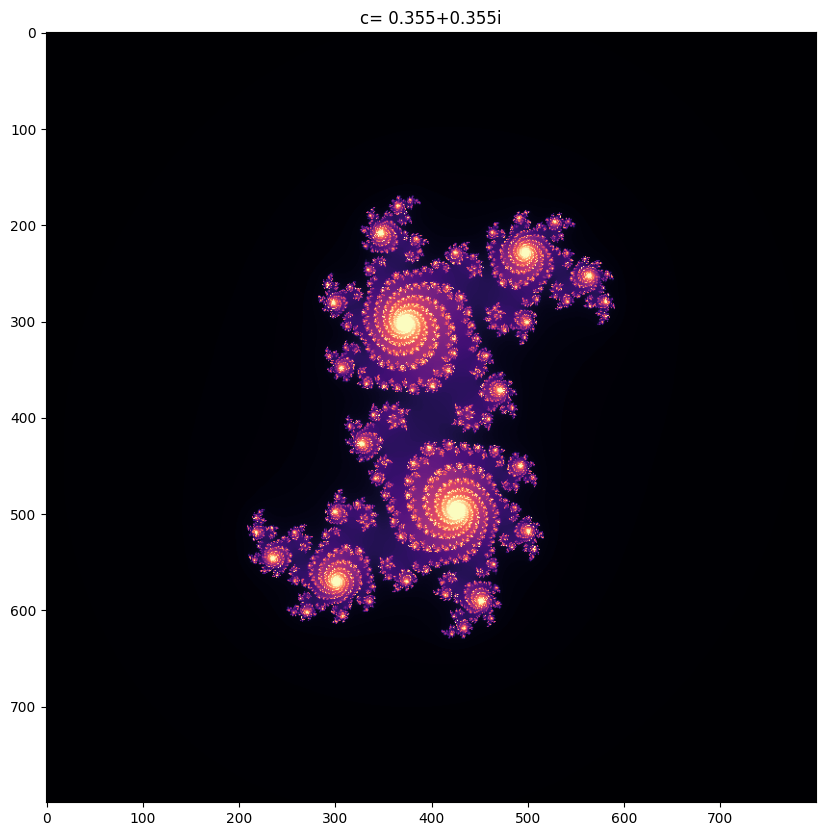

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


#step 1: defining a function that does the julia equation
def juliaequation(zx, zy, cx, cy, threshold):
    z = complex(zx, zy)     # initial conditions
    c = complex(cx, cy)
    for i in range(threshold): #making a threshold that Calculates if the number z with a constant c belongs to the Julia set
        z = z**2 + c
        if abs(z) > 4.:  # diverging
            return i
    return threshold - 1  # it didn't diverge



#step 2: making a complex plane
xstart, ystart = -2, -2  # starting points
width, height = 4, 4  # for 3 units to the left and to the right
pixel = 200  # how many pixles per unit
real = np.linspace(xstart, xstart+width, width*pixel )  # real axis
imaginary = np.linspace(ystart, ystart+height, height*pixel)  # imaginary axis

X = np.empty((len(real), len(imaginary)))  # emptying each pixel so it can be filled after



#step 3: making the given c understandable for our code  (as c = rcos(a) + i rsin(a) = re^(ia) = 0.355+0.355i )  

cx, cy =0.355,0.355



#step 4: fill the image with the number of interations
threshold = 200  # max allowed iterations
for i in range(len(real)):
    for j in range(len(imaginary)):
        X[i, j] = juliaequation(zx=real[i], zy=imaginary[j], cx=cx, cy=cy, threshold=threshold)  



#step 5: plotting
plt.figure(figsize=(10, 10)) #make the whole pic bigger (visually)
ax = plt.axes() 
ax.imshow(X.T, cmap='magma')
plt.title("c= 0.355+0.355i")
plt.show()


#### Image c=-0.7269+0.1889i (produces a dragon-like shape)

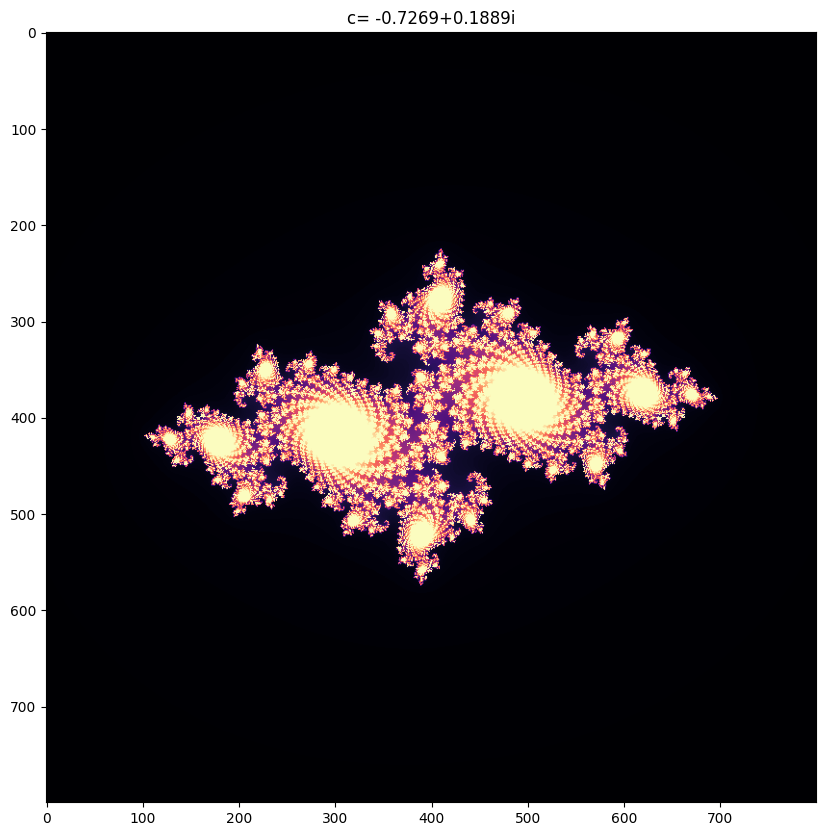

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


#step 1: defining a function that does the julia equation
def juliaequation(zx, zy, cx, cy, threshold):
    z = complex(zx, zy)     # initial conditions
    c = complex(cx, cy)
    for i in range(threshold): #making a threshold that Calculates if the number z with a constant c belongs to the Julia set
        z = z**2 + c
        if abs(z) > 4.:  # diverging
            return i
    return threshold - 1  # it didn't diverge



#step 2: making a complex plane
xstart, ystart = -2, -2  # starting points
width, height = 4, 4  # for 3 units to the left and to the right
pixel = 200  # how many pixles per unit
real = np.linspace(xstart, xstart+width, width*pixel )  # real axis
imaginary = np.linspace(ystart, ystart+height, height*pixel)  # imaginary axis

X = np.empty((len(real), len(imaginary)))  # emptying each pixel so it can be filled after



#step 3: making the given c understandable for our code  (as c = rcos(a) + i rsin(a) = re^(ia) = -0.7269+0.1889i )  

cx, cy = -0.7269, 0.1889



#step 4: fill the image with the number of interations
threshold = 200  # max allowed iterations
for i in range(len(real)):
    for j in range(len(imaginary)):
        X[i, j] = juliaequation(zx=real[i], zy=imaginary[j], cx=cx, cy=cy, threshold=threshold)  



#step 5: plotting
plt.figure(figsize=(10, 10)) #make the whole pic bigger (visually)
ax = plt.axes() 
ax.imshow(X.T, cmap='magma')
plt.title("c= -0.7269+0.1889i")
plt.show()
